27/27 [==============================] - 0s 2ms/step - loss: 9257.5801 - accuracy: 0.3981
ANN accuracy: 0.3981264531612396




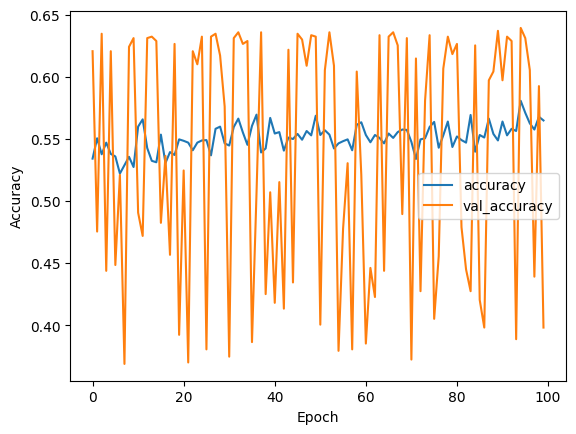

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

# Load the dataset
dataset = pd.read_csv("/content/loan_approval_dataset.csv")

# Data preprocessing
label_encoder = LabelEncoder()
dataset[' education'] = label_encoder.fit_transform(dataset[' education'])
dataset[' self_employed'] = label_encoder.fit_transform(dataset[' self_employed'])
dataset[' loan_status'] = label_encoder.fit_transform(dataset[' loan_status'])

# Split features and target variable
X = dataset.drop(columns=[' loan_status'])
y = dataset[' loan_status']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# Build the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print("ANN accuracy:", accuracy)
print("\n")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
